In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_excel('../data/BlackFriday.xlsx')
data.drop_duplicates(inplace=True)#去重
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  int64 
 1   Product_ID                  537577 non-null  object
 2   Gender                      537577 non-null  int64 
 3   Age                         537577 non-null  int64 
 4   Occupation                  537577 non-null  int64 
 5   City_Category               537577 non-null  int64 
 6   Stay_In_Current_City_Years  537577 non-null  int64 
 7   Marital_Status              537577 non-null  int64 
 8   Product_Category_1          537577 non-null  int64 
 9   Product_Category_2          537577 non-null  int64 
 10  Product_Category_3          537577 non-null  int64 
 11  Purchase                    537577 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 53.3+ MB
None


In [2]:
data.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T


,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
User_ID,537577.0,1.002992e+06,1714.392695,1000001.0,1000066.0,1000658.6,1001495.0,1003031.0,1004417.0,1005402.0,1005976.0,1006040.0
Gender,537577.0,7.540873e-01,0.430627,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
Age,537577.0,2.494755e+00,1.352583,0.0,0.0,1.0,2.0,2.0,3.0,5.0,6.0,6.0
Occupation,537577.0,8.082710e+00,6.524120,0.0,0.0,0.0,2.0,7.0,14.0,17.0,20.0,20.0
City_Category,537577.0,1.040567e+00,0.759627,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0
Stay_In_Current_City_Years,537577.0,1.859458e+00,1.289828,0.0,0.0,0.0,1.0,2.0,3.0,4.0,4.0,4.0
Marital_Status,537577.0,4.087973e-01,0.491612,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
Product_Category_1,537577.0,5.295546e+00,3.750701,1.0,1.0,1.0,1.0,5.0,8.0,11.0,16.0,18.0
Product_Category_2,537577.0,6.784907e+00,6.211618,0.0,0.0,0.0,0.0,5.0,14.0,16.0,17.0,18.0
Product_Category_3,537577.0,3.871773e+00,6.265963,0.0,0.0,0.0,0.0,0.0,8.0,15.0,17.0,18.0


<AxesSubplot:>

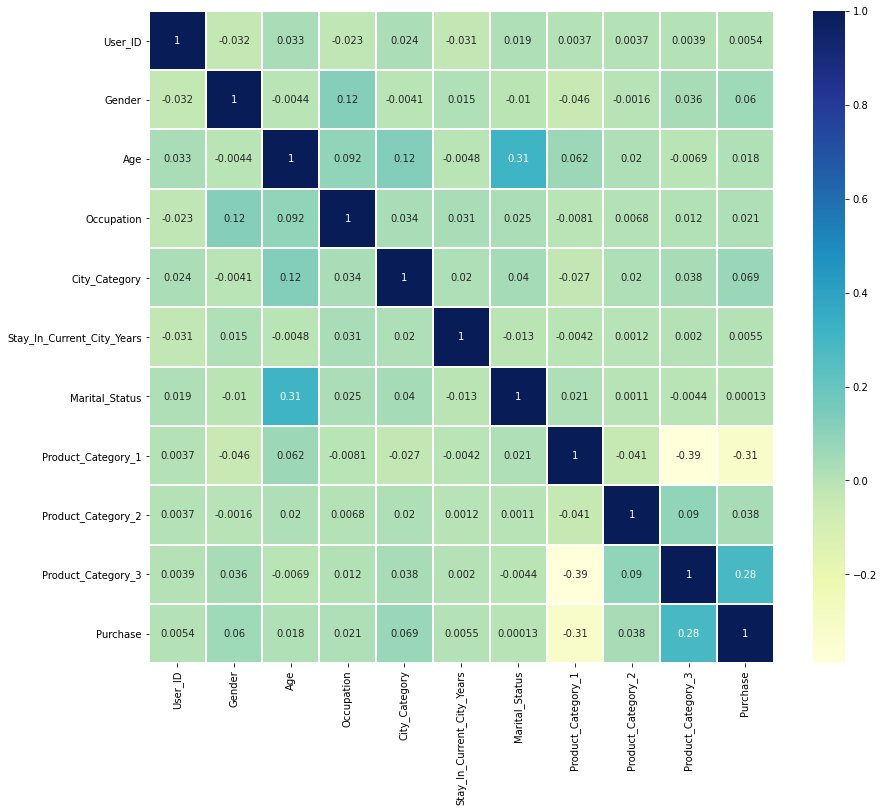

In [4]:
import seaborn as sns
corr=data.corr('pearson') # 此处使用Pearson相关系数描述变量间的线性相关关系
plt.figure(figsize=(14,12))
sns.heatmap(corr,annot=True,linewidths=.3,cmap='YlGnBu')

## 划分数据集

In [8]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,1:]
y = data.iloc[:,0]
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X_train, X_vali, Y_train, Y_vali = train_test_split(X,y,test_size=0.3,random_state=420)
model_data = pd.concat([Y_train, X_train], axis=1) # 训练数据，用来构建模型

In [9]:
model_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
424552,1005366,P00117442,1,1,12,2,3,0,5,14,0,7162
349746,1005862,P00016842,0,2,9,2,0,1,1,2,15,19483
427695,1005846,P00240842,1,4,16,2,1,1,8,0,0,9887
430966,1000331,P00006142,1,2,7,1,1,0,8,0,0,8005
159074,1000602,P00191142,0,6,6,2,2,0,4,15,0,3498
...,...,...,...,...,...,...,...,...,...,...,...,...
10394,1001600,P00127242,1,3,7,1,1,1,1,16,0,11458
1209,1000198,P00184442,1,2,12,0,0,1,1,6,8,7839
178094,1003557,P00231342,1,1,5,1,0,1,5,8,14,7042
510579,1000690,P00036242,1,2,12,2,3,0,5,8,0,7058


In [11]:
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns

In [12]:
model_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1005366,P00117442,1,1,12,2,3,0,5,14,0,7162
1,1005862,P00016842,0,2,9,2,0,1,1,2,15,19483
2,1005846,P00240842,1,4,16,2,1,1,8,0,0,9887
3,1000331,P00006142,1,2,7,1,1,0,8,0,0,8005
4,1000602,P00191142,0,6,6,2,2,0,4,15,0,3498
...,...,...,...,...,...,...,...,...,...,...,...,...
376298,1001600,P00127242,1,3,7,1,1,1,1,16,0,11458
376299,1000198,P00184442,1,2,12,0,0,1,1,6,8,7839
376300,1003557,P00231342,1,1,5,1,0,1,5,8,14,7042
376301,1000690,P00036242,1,2,12,2,3,0,5,8,0,7058


In [13]:
vali_data = pd.concat([Y_vali, X_vali], axis=1) # 验证集
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns

In [14]:
vali_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000958,P00058042,1,3,2,2,3,0,8,16,0,8110
1,1001748,P00075542,1,5,1,0,1,1,8,13,0,7813
2,1000752,P00161442,0,2,3,0,3,0,5,14,0,8820
3,1000390,P00354442,1,2,4,0,0,0,5,0,0,7152
4,1004579,P00190142,0,1,4,1,1,1,3,4,5,10750
...,...,...,...,...,...,...,...,...,...,...,...,...
161269,1001366,P00295842,1,0,10,2,0,0,5,8,0,7129
161270,1001125,P00196142,0,1,4,1,2,0,3,4,5,8160
161271,1004995,P00215642,1,5,20,1,0,1,8,0,0,5872
161272,1000336,P00209742,1,1,0,2,4,0,1,11,15,19476


In [16]:
model_data.to_csv(r"../data/model_data.csv", encoding='utf_8_sig') # 训练数据
vali_data.to_csv(r"../data/vali_data.csv", encoding='utf_8_sig') # 验证数据

## 数据分箱

In [ ]:
import scipy
def graphforbestbin(DF, X, Y, n=5,q=20,graph=True):
    '''
    自动最优分箱函数，基于卡方检验的分箱

    参数：
    DF: 需要输入的数据
    X: 需要分箱的列名
    Y: 分箱数据对应的标签 Y 列名
    n: 保留分箱个数
    q: 初始分箱的个数
    graph: 是否要画出IV图像

    区间为前开后闭 (]

    '''
    
    DF = DF[[X,Y]].copy()
    
    # 按照等频对需要分箱的列进行分箱,cut为等距分箱,qcut为等频分箱
    DF["qcut"],bins = pd.qcut(DF[X], retbins=True, q=q,duplicates="drop")
    """
    pd.qcut，基于分位数的分箱函数，本质是将连续型变量离散化。只能够处理一维数据。
    返回箱子的上限和下限
    参数q：要分箱的个数
    参数retbins=True来要求同时返回结构为索引为样本索引，元素为分到的箱子的Series
    现在返回两个值：每个样本属于哪个箱子，以及所有箱子的上限和下限
    参数duplicates：是否允许重复区间。当duplicates='drop'时，序列中有重复值时会对分箱合并
    """  
    # 统计每个分段 0，1的数量
    coount_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    coount_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    # num_bins值分别为每个区间的上界，下界，0的频次，1的频次
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]
    # 注：zip会按照最短的那一个列表（这里是bins[1:]）进行结合，因此能够巧妙形成各箱子上下限的形式
    
    # 确保每个分组的数据都包含有 0 和 1
    for i in range(q): # 初始分组不会超过q=20
        # 如果第一个组没有包含正样本或负样本，向后合并
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2]+num_bins[1][2],
                num_bins[0][3]+num_bins[1][3])]
            continue
        """
        合并了之后，第一行的组是否一定有两种样本了呢？不一定
        如果原本的第一组和第二组都没有包含正样本，或者都没有包含负样本，那即便合并之后，第一行的组也还是没有包含两种样本
        所以我们在每次合并完毕之后，还需要再检查，第一组是否已经包含了两种样本
        这里使用continue跳出了本次循环，开始下一次循环，所以回到了最开始的for i in range(20), 让i+1
        这就跳过了下面的代码，又从头开始检查，第一组是否包含了两种样本
        如果第一组中依然没有包含两种样本，则if通过，继续合并，每合并一次就会循环检查一次，最多合并20次
        如果第一组中已经包含两种样本，则if不通过，就开始执行下面的代码
        """
        # 已经确认第一组中肯定包含两种样本了，如果其他组没有包含两种样本，就向前合并
        # 此时的num_bins已经被上面的代码处理过，可能被合并过，也可能没有被合并
        # 但无论如何，我们要在num_bins中遍历，所以写成in range(len(num_bins))
        # 其他组出现没有 0 或 1，向前合并
        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(
                    num_bins[i-1][0],
                    num_bins[i][1],
                    num_bins[i-1][2]+num_bins[i][2],
                    num_bins[i-1][3]+num_bins[i][3])]
                break
        # 如果对第一组和对后面所有组的判断中，都没有进入if去合并，则提前结束所有的循环
        else:
            break
        
        """
        这个break，只有在if被满足的条件下才会被触发
        也就是说，只有发生了合并，才会打断for i in range(len(num_bins))这个循环
        为什么要打断这个循环？因为我们是在range(len(num_bins))中遍历
        但合并发生后，len(num_bins)发生了改变，但循环却不会重新开始
        举个例子，本来num_bins是5组，for i in range(len(num_bins))在第一次运行的时候就等于for i in range(5)
        range中输入的变量会被转换为数字，不会跟着num_bins的变化而变化，所以i会永远在[0,1,2,3,4]中遍历
        进行合并后，num_bins变成了4组，已经不存在=4的索引了，但i却依然会取到4，循环就会报错
        因此在这里，一旦if被触发，即一旦合并发生，我们就让循环被破坏，使用break跳出当前循环
        循环就会回到最开始的for i in range(20)中
        此时判断第一组是否有两种标签的代码不会被触发，但for i in range(len(num_bins))却会被重新运行
        这样就更新了i的取值，循环就不会报错了
        """

    # 定义计算 woe 的函数
    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total # bad_rate是一个箱中，坏的样本所占的比例 (bad/total)
        df["good%"] = df.count_0/df.count_0.sum() # good%是一个箱中的好样本占整个特征中的好样本的比例
        df["bad%"] = df.count_1/df.count_1.sum() # bad%是一个箱中的坏样本占整个特征中的坏样本的比例
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df

    # 创建计算 IV 值函数
    def get_iv(df):
        rate = ((df.count_0/df.count_0.sum()) -
                (df.count_1/df.count_1.sum()))
        iv = np.sum(rate * df.woe)
        return iv

    IV = []
    axisx = []
    bins_df = get_woe(num_bins)
    # 重复执行循环至分箱保留 n 组：
    while len(num_bins) > n:
        # 获取 num_bins 两两之间的卡方检验的置信度（或卡方值）
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            # 0 返回 chi2 值，1 返回 p 值，2 返回自由度，3 返回与原数据数组同维度的对应理论值。这里计算p值
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
            # degree_of_freedom = scipy.stats.chi2_contingency([x1,x2])[2]
            pvs.append(pv)

        # 合并 p 值最大的两组
        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
            num_bins[i][0], # 左箱子的下限
            num_bins[i+1][1], # 右箱子的上限
            num_bins[i][2]+num_bins[i+1][2], # 左箱子和右箱子的好样本总数
            num_bins[i][3]+num_bins[i+1][3])] # 左箱子和右箱子的坏样本总数

        # 打印合并后的分箱信息
        bins_df = get_woe(num_bins)
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
        
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.title('“'+ X + '”的IV值随分箱个数的变化情况')
        plt.xlabel("分箱个数")
        plt.ylabel("IV值")
        plt.show()
        # 选择转折点处，也就是下坠最快的折线点
    return bins_df